In [10]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier

In [11]:
def printConfusionMatrix(cm, labels, title=""):

    df_cm = pd.DataFrame(cm, labels, labels)
    # plt.figure(figsize=(10,7))
    sn.set(rc={'figure.figsize':(10,7)})
    sn.set(font_scale=1.4) # for label size
    ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    ax.set_title(title)
    ax.set(xlabel='Predicted Labels', ylabel='Real Labels')


    pyplot.show()

## Load Data

In [12]:
with open('data/data_eval_arduino_s3.pkl', 'rb') as f:
    data = pickle.load(f)

In [13]:
X_eval = [d[0] for d in data]
y_eval_ard = [d[1] for d in data]
y_eval = [d[2] for d in data]

## Load Model

In [14]:
with open('models/rf_model_s3.pkl', 'rb') as f:
    model = pickle.load(f)


## Evaluate Peformances

### Arduino

In [15]:
f1_score(y_eval, y_eval_ard, average="weighted")

0.7730495014421201

In [16]:
print(classification_report(y_eval, y_eval_ard))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.74      0.70      0.72        20
           2       0.71      0.75      0.73        20
           3       1.00      1.00      1.00        20
           4       0.58      0.90      0.71        20
           5       0.78      0.35      0.48        20

    accuracy                           0.78       120
   macro avg       0.80      0.78      0.77       120
weighted avg       0.80      0.78      0.77       120



In [17]:
print(confusion_matrix(y_eval, y_eval_ard))

[[20  0  0  0  0  0]
 [ 0 14  6  0  0  0]
 [ 0  5 15  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 18  2]
 [ 0  0  0  0 13  7]]


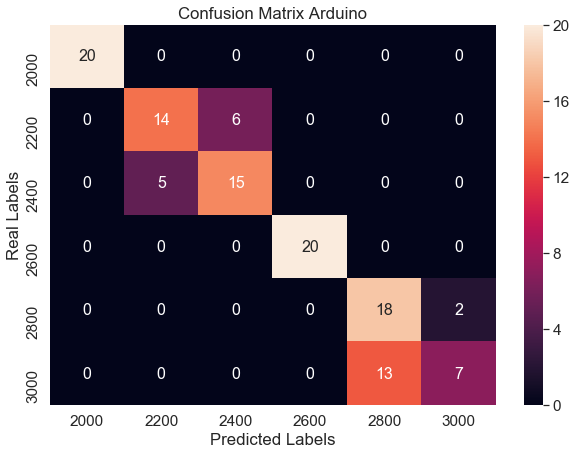

In [22]:
labels = [2000 + 200* i for i in range(0,6)]

cm_arduino = confusion_matrix(y_eval, y_eval_ard)

printConfusionMatrix(cm_arduino, labels, "Confusion Matrix Arduino")


### Full Model

In [18]:
y_eval_pred = model.predict(X_eval)

In [19]:
f1_score(y_eval, y_eval_pred, average="weighted")

0.7359175276795414

In [20]:
print(classification_report(y_eval, y_eval_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.33      0.05      0.09        20
           2       0.49      0.90      0.63        20
           3       1.00      1.00      1.00        20
           4       0.79      0.95      0.86        20
           5       0.94      0.75      0.83        20

    accuracy                           0.78       120
   macro avg       0.76      0.78      0.74       120
weighted avg       0.76      0.78      0.74       120



In [21]:
print(confusion_matrix(y_eval, y_eval_pred))

[[20  0  0  0  0  0]
 [ 0  1 19  0  0  0]
 [ 0  2 18  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 19  1]
 [ 0  0  0  0  5 15]]


### Confusion Matrix Comparison

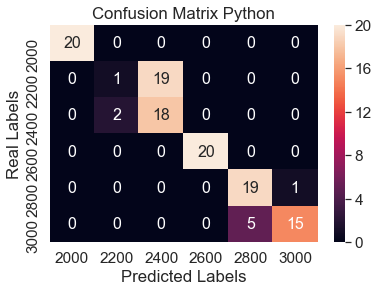

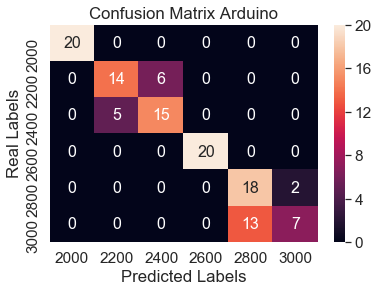

In [27]:
labels = [2000 + 200* i for i in range(0,6)]

cm_python = confusion_matrix(y_eval, y_eval_pred)
cm_arduino = confusion_matrix(y_eval, y_eval_ard)

printConfusionMatrix(cm_python, labels, "Confusion Matrix Python")
printConfusionMatrix(cm_arduino, labels, "Confusion Matrix Arduino")
